# Machine Learning
> * **Unsupervised Learning**
>> * Clustering
>> * Anomaly detection
>> * Dimensionality reduction
> * **Supervised Learning**
>> * Classifcation
>> * Regression
> * **Reinforcement Learning**

# Machine Learning algorithms
> 1. Linear Regression
> 2. Logistic Regression
> 3. K-Means Clustering
> 4. K-Nearest Neighbors(KNN) Classifcation
> 5. Naive Bayes Classifcation
> 6. Decision Trees
> 7. Support Vector Machine(SVM)
> 8. Artifical Neural Netwrok(ANN)
> 9. Apriori
> 10. AdaBoost

> * http://vitalflux.com/cheat-sheet-10-machine-learning-algorithms-r-commands/

# R commands
> 1. lm_model <- lm(y ~ x1 + x2, data=as.data.frame(cbind(y,x1,x2)))
> 2. glm_model <- glm(y ~ x1+x2, family=binomial(link="logit"), data=as.data.frame(cbind(y,x1,x2)))
> 3. kmeans_model <- kmeans(x=X, centers=m)
> 4. knn_model <- knn(train=X_train, test=X_test, cl=as.factor(labels), k=K)
> 5. naiveBayes_model <- naiveBayes(y ~ x1 + x2, data=as.data.frame(cbind(y,x1,x2)))
> 6. cart_model <- rpart(y ~ x1 + x2, data=as.data.frame(cbind(y,x1,x2)), method="class")
> 7. svm_model <- svm(x=X, y=as.factor(labels), kernel ="radial", cost=C)
> 8. ann_model <- neuralnet( y ~ x1 + x2 + x3, data=as.data.frame(cbind(y,x1,x2, x3)), hidden = 1)
> 8. p <- compute( ann_model, as.data.frame(cbind(x1,x2)) )
> 9. apriori_model <- apriori(as.matrix(sampleDataset), parameter = list(supp = 0.8, conf = 0.9))
> 10. boost_model <- ada(x=X, y=labels)

# Workflow
> * Input data
> * Data preprocessing
> * Training, Validation(for setting hyperparameters) and test split
> * Modeling
> * Prediction and Evaluations

---

# SVM

# Linear SVM Classifier

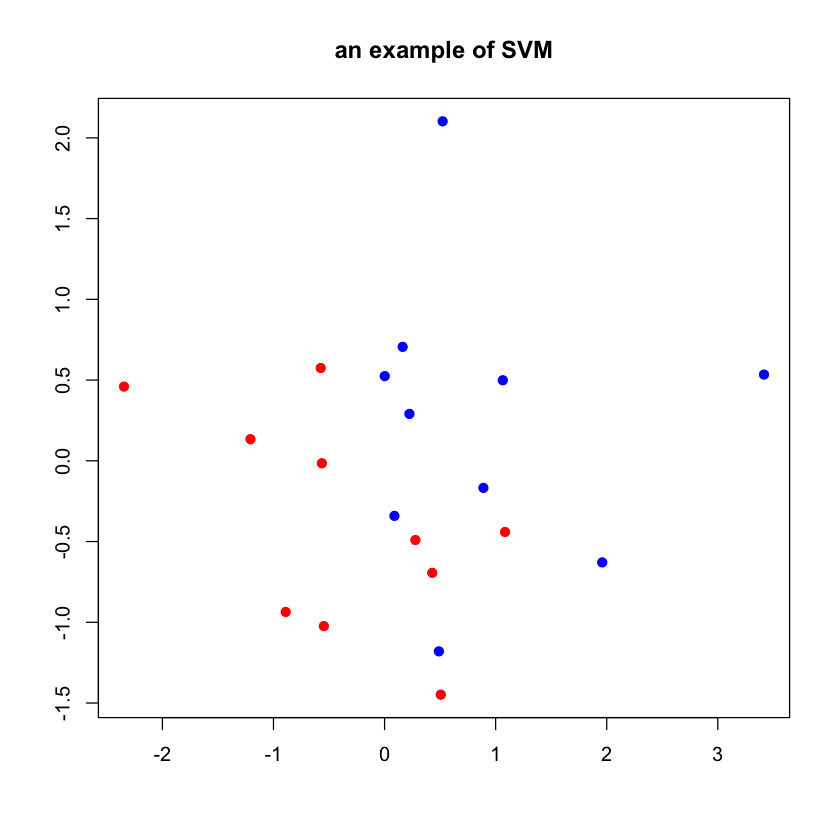

In [3]:
set.seed(1234)

x <- matrix(rnorm(40), 20, 2)
y <- rep(c(-1,1), c(10, 10))
x[y==1,] <- x[y==1, ] + 1
plot(x, col = y+3, pch=19, xlab="", ylab="", main = "an example of SVM")

In [37]:
library(e1071)

df <- data.frame(x, y = as.factor(y))
svm_model <- svm(y ~., data=df, kernel='linear', cost=10, scale = FALSE)
summary(svm_model)


Call:
svm(formula = y ~ ., data = df, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.5 

Number of Support Vectors:  10

 ( 5 5 )


Number of Classes:  2 

Levels: 
 -1 1




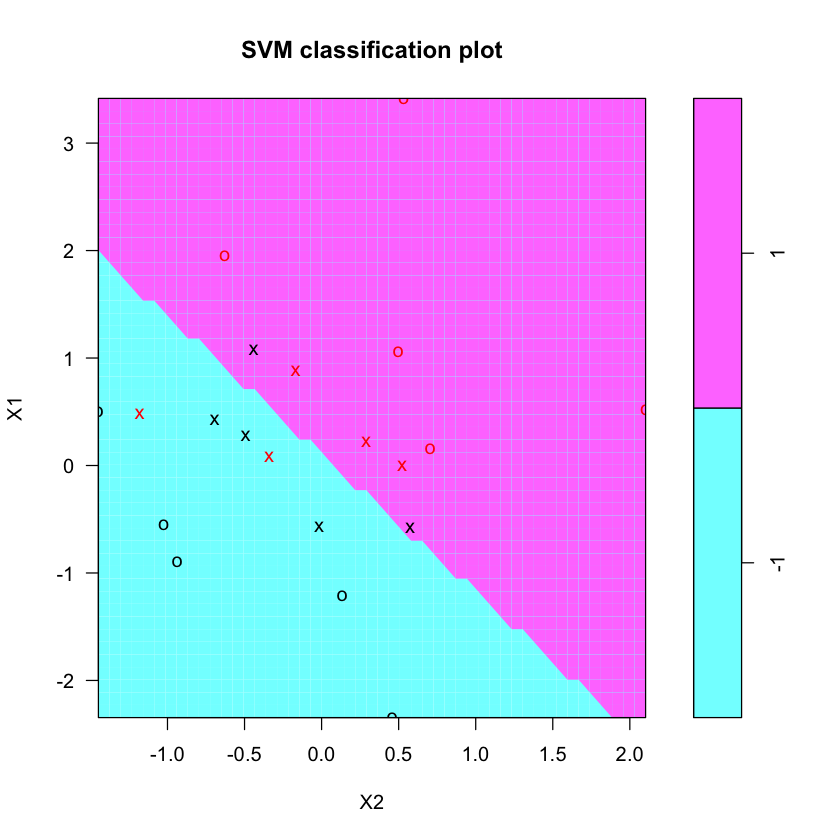

In [38]:
plot(svm_model, df)

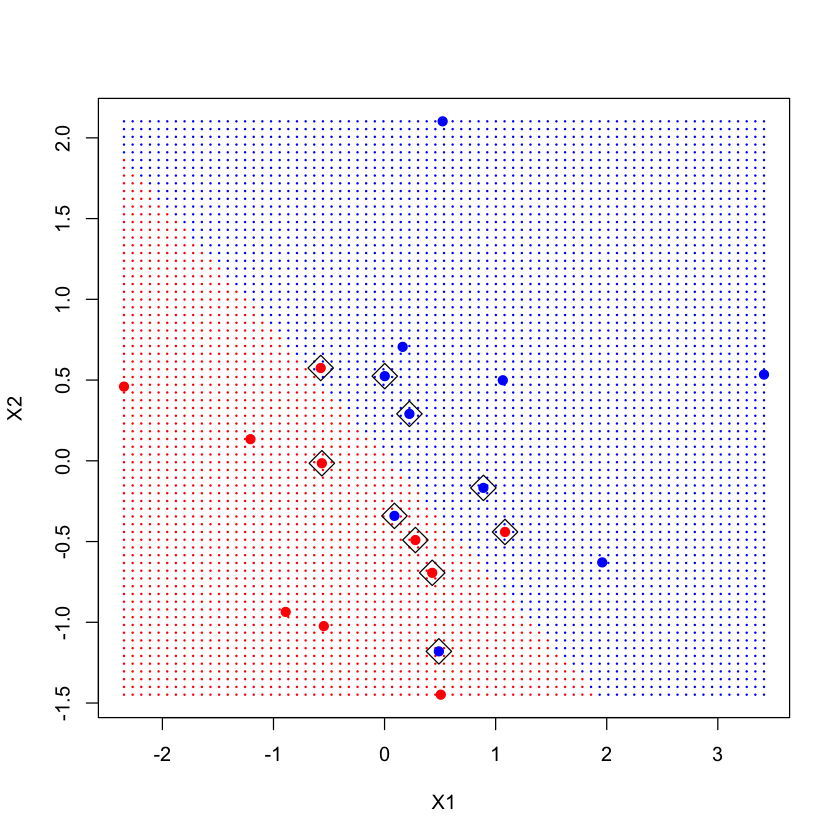

In [42]:
make.grid = function(x, n = 75) {
    grange = apply(x, 2, range)
    x1 = seq(from = grange[1, 1], to = grange[2, 1], length = n)
    x2 = seq(from = grange[1, 2], to = grange[2, 2], length = n)
    expand.grid(X1 = x1, X2 = x2)
}
xgrid = make.grid(x)
ygrid = predict(svm_model, xgrid)
plot(xgrid, col = c("red", "blue")[as.numeric(ygrid)], pch = 20, cex = 0.2)
points(x, col = y + 3, pch = 19)
points(x[svm_model$index, ], pch = 5, cex = 2)

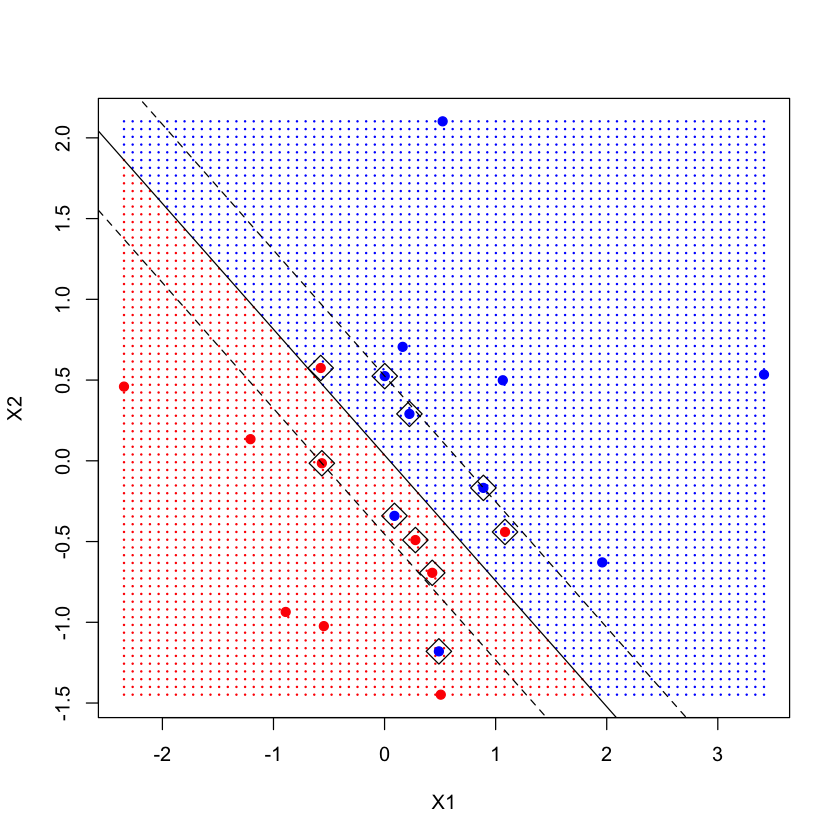

In [47]:
beta = drop(t(svm_model$coefs) %*% x[svm_model$index, ])
beta0 = svm_model$rho
plot(xgrid, col = c("red", "blue")[as.numeric(ygrid)], pch = 20, cex = 0.2)
points(x, col = y + 3, pch = 19)
points(x[svm_model$index, ], pch = 5, cex = 2)
abline(beta0/beta[2], -beta[1]/beta[2])
abline((beta0 - 1)/beta[2], -beta[1]/beta[2], lty = 2)
abline((beta0 + 1)/beta[2], -beta[1]/beta[2], lty = 2)

# Nonlinear SVM classifier

[1] "x"        "y"        "xnew"     "prob"     "marginal" "px1"      "px2"     
[8] "means"

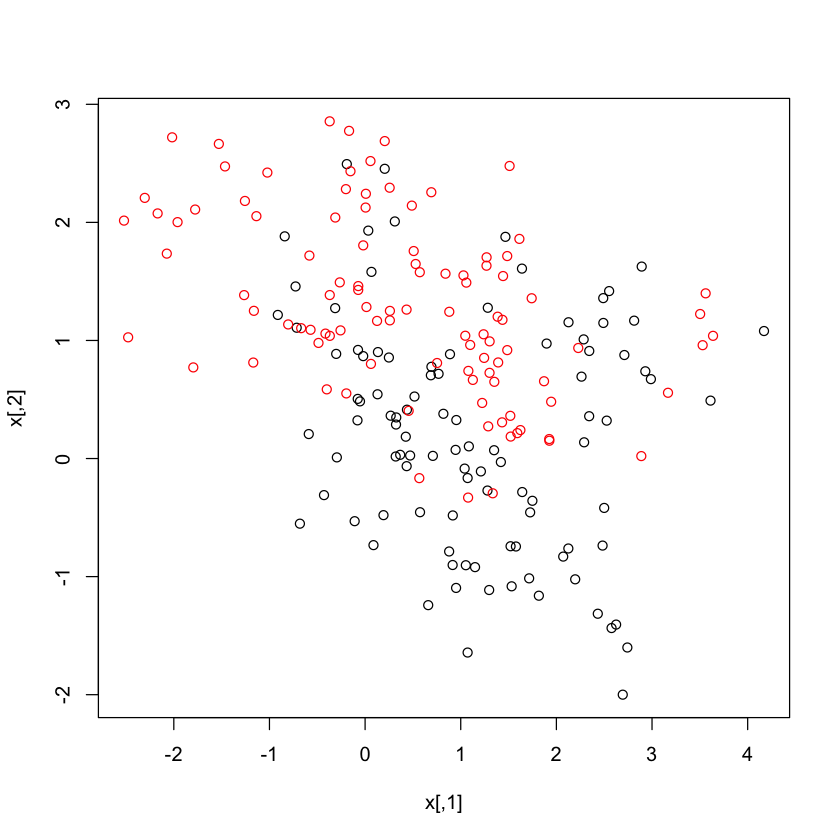

In [49]:
load(url("http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/ESL.mixture.rda"))
names(ESL.mixture)

rm(x, y)
attach(ESL.mixture)

plot(x, col = y + 1)

In [50]:
dat = data.frame(y = factor(y), x)
fit = svm(factor(y) ~ ., data = dat, scale = FALSE, kernel = "radial", cost = 5)

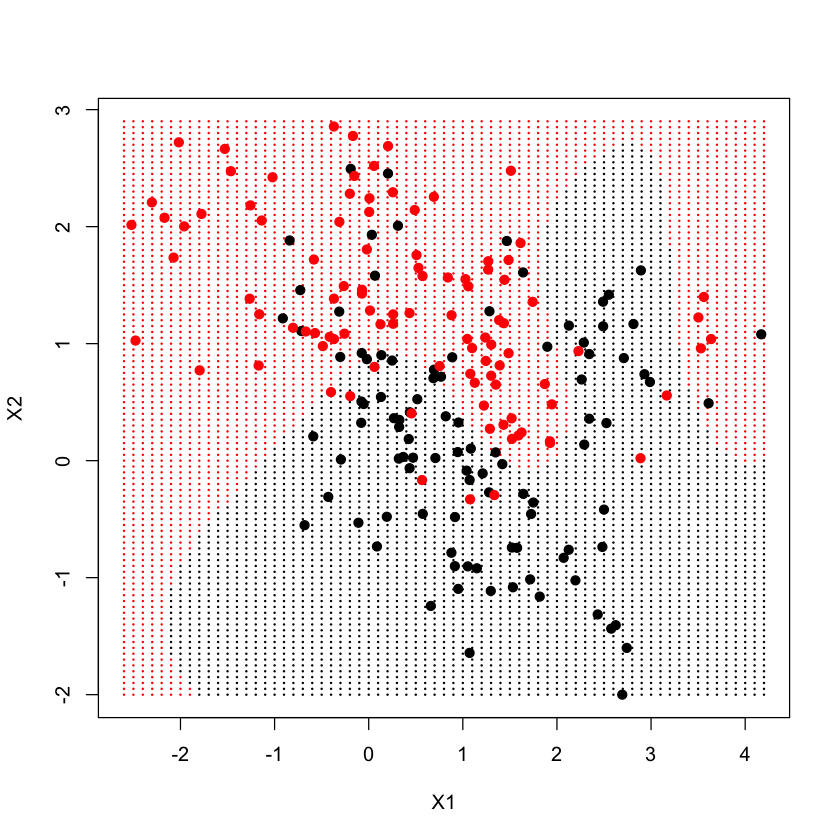

In [51]:
xgrid = expand.grid(X1 = px1, X2 = px2)
ygrid = predict(fit, xgrid)
plot(xgrid, col = as.numeric(ygrid), pch = 20, cex = 0.2)
points(x, col = y + 1, pch = 19)

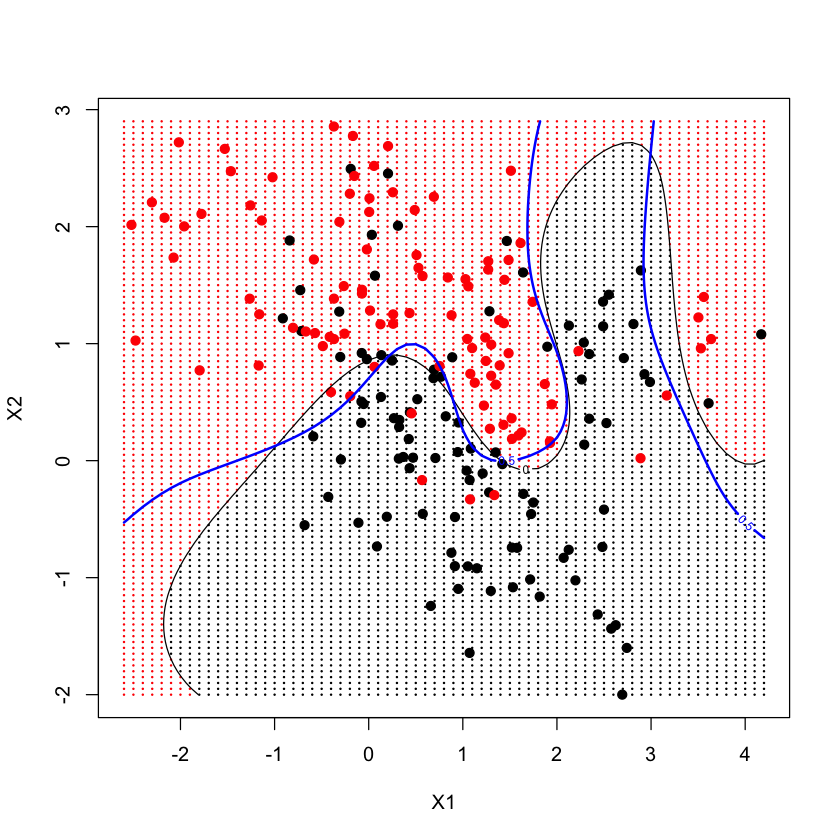

In [52]:
func = predict(fit, xgrid, decision.values = TRUE)
func = attributes(func)$decision
xgrid = expand.grid(X1 = px1, X2 = px2)
ygrid = predict(fit, xgrid)
plot(xgrid, col = as.numeric(ygrid), pch = 20, cex = 0.2)
points(x, col = y + 1, pch = 19)

contour(px1, px2, matrix(func, 69, 99), level = 0, add = TRUE)
contour(px1, px2, matrix(prob, 69, 99), level = 0.5, add = TRUE, col = "blue", 
    lwd = 2)

# SVM example

In [21]:
library(e1071)

head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [22]:
svm_model <- svm(Species ~., data=iris)
summary(svm_model)


Call:
svm(formula = Species ~ ., data = iris)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.25 

Number of Support Vectors:  51

 ( 8 22 21 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




In [24]:
pred <- predict(svm_model, x)
table(pred, y)

            y
pred         setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         2
  virginica       0          2        48

In [27]:
svm_tune <- tune(svm, train.x=x, train.y=y,
                kernel='radial', ranges=list(cost=10^(-1:2), gamma=c(.5, 1, 2)))
print(svm_tune)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.5

- best performance: 0.04666667 



In [28]:
svm_model_after_tune <- svm(Species ~ ., data=iris, kernel='radial',
                           cost=1, gamma=0.5)
summary(svm_model_after_tune)


Call:
svm(formula = Species ~ ., data = iris, kernel = "radial", cost = 1, 
    gamma = 0.5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  59

 ( 11 23 25 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




In [29]:
pred2 <- predict(svm_model_after_tune, x)
table(pred2, y)

            y
pred2        setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         2
  virginica       0          2        48

---